Gershberg-Saxton algorithm: simple implementation

In [462]:
# Let:
#  FT – forward Fourier transform
#  IFT – inverse Fourier transform
#  i – the imaginary unit, √−1 (square root of −1)
#  exp – exponential function (exp(x) = ex)
#  Target and Source be the Target and Source Amplitude planes respectively
#  A, B, C & D be complex planes with the same dimension as Target and Source
#  Amplitude – Amplitude-extracting function:
#    e.g. for complex z = x + iy, amplitude(z) = sqrt(x·x + y·y)
#        for real x, amplitude(x) = |x|
#  Phase – Phase extracting function:
#    e.g. Phase(z) = arctan(y / x)
# end Let
#
# algorithm Gerchberg–Saxton(Source, Target, Retrieved_Phase) is
#     A := IFT(Target)
#     while error criterion is not satisfied
#         B := Amplitude(Source) × exp(i × Phase(A))
#         C := FT(B)
#         D := Amplitude(Target) × exp(i × Phase(C))
#         A := IFT(D)
#     end while
#     Retrieved_Phase = Phase(A)

In [463]:
from scipy.fft import fft, ifft
import cmath
import matplotlib.pyplot as plt
import PIL.Image as img
from numpy import asarray
import numpy as np

In [464]:
i = complex(1,1) #setting i as i
iterations = 20 #this is a temporary value for the error criterion

def amplitude(plane): #using example amplitude-extracting function
    #this function takes and returns an array
    for R in range(len(plane)):
        for Ran in range(len(plane[R])):
                for ran in range(len(plane[R][Ran])):
                    plane[R][Ran][ran] = cmath.sqrt(plane[R][Ran][ran].real**2 + plane[R][Ran][ran].imag**2)
    return plane

def phase(plane): #using example phase-extracting function
     #this function takes and returns an array
    for R in range(len(plane)):
        for Ran in range(len(plane[R])):
            for ran in range(len(plane[R][Ran])):
                plane[R][Ran][ran] = cmath.atan(plane[R][Ran][ran].imag / plane[R][Ran][ran].real)
    return plane

def produceBD(ampsrc, phasa):
    B = np.copy(ampsrc)
    for R in range(len(ampsrc)):
        for Ran in range(len(ampsrc[R])):
            for ran in range(len(ampsrc[R][Ran])):
                B[R][Ran][ran] = ampsrc[R][Ran][ran] * cmath.exp(i * phasa[R][Ran][ran])
    return B

def ger_sax(Source, Target, Retrieved_Phase):
    A = ifft(Target)

    for R in range(0,iterations): #Temporary error criterion
        # may have to implement this differently as it's for arrays

        # B = amplitude(Source) * cmath.exp(i * phase(A))
        B = produceBD(amplitude(Source),phase(A))
        C = fft(B)
        # D = amplitude(Target) * cmath.exp(i * phase(C))
        D = produceBD(amplitude(Target),phase(C))
        A = ifft(D)
        Retrieved_Phase = phase(A)

        print("new iteration!\n")
        print(Retrieved_Phase)
        plt.imshow(abs(Retrieved_Phase))
        plt.show()

    return Retrieved_Phase

def gen_random_mask(size): #size is a 2d array
    randarr = np.random.rand(size[0],size[1],size[2])
    print(randarr)
    return randarr

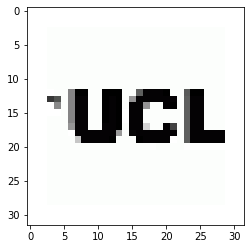

[[[1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  ...
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]]

 [[1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  ...
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]]

 [[1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  ...
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]]

 ...

 [[1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  ...
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]]

 [[1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  ...
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]]

 [[1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  ...
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]
  [1.0122713+0.01242306j]]]
[[[0.32587

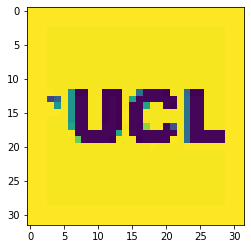

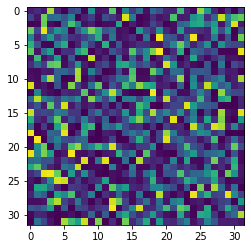

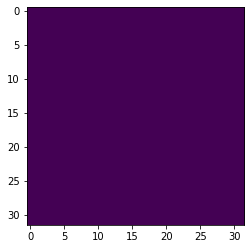

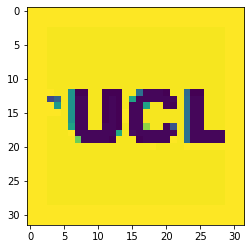

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in float_scalars


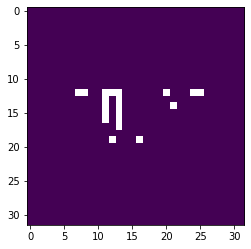

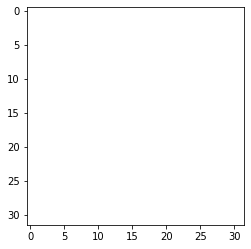

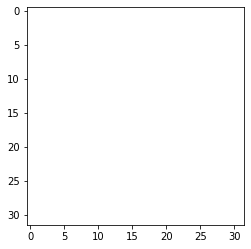

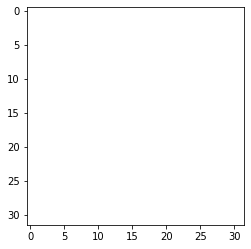

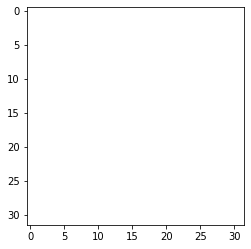

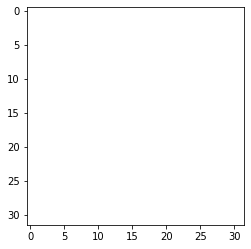

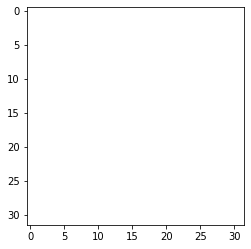

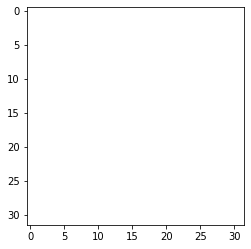

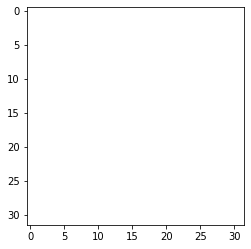

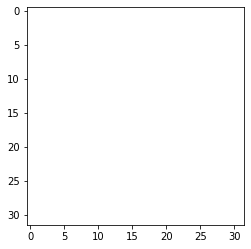

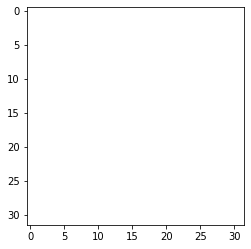

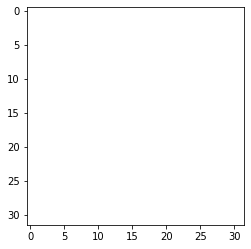

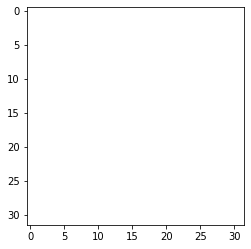

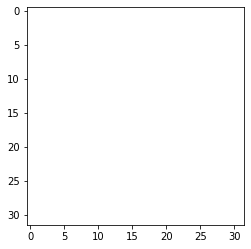

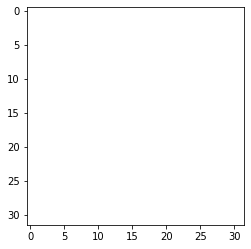

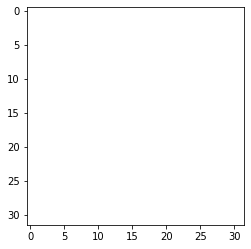

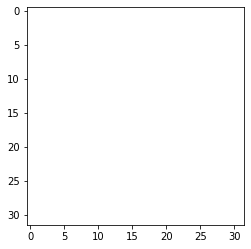

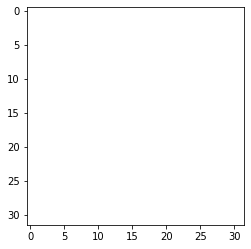

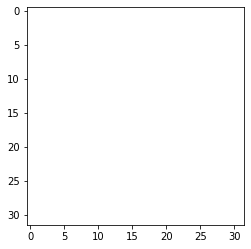

TypeError: Cannot handle this data type: (1, 1, 1), <c8

In [465]:
def main():
    image = plt.imread('UCL32.png')
    # image = img.open('UCL32.png')
    # print(image.format)
    # print(image.size)
    # print(image.mode)
    plt.imshow(image)
    plt.show() #this is the target
    # data = asarray(image)
    # print(image)
    image = image[:,:,:1]
    image = np.exp(i*abs(image)/256 * np.pi)
    print(image)
    # print(image.dtype)
    # print(data.dtype)
    #we need an initial retrieved phase and source
    source = np.exp(i*gen_random_mask(image.shape)* np.pi)
    ret_phase = np.full(image.shape,i*0*np.pi,np.complex)
    print(ret_phase)
    #show them as images then run the algorithm on them
    # img_again = img.fromarray(data)
    # plt.imshow(img_again)
    # plt.show()
    plt.imshow(abs(image))
    plt.show()

    plt.imshow(abs(source))
    plt.show()

    # blank = img.fromarray(ret_phase)
    plt.imshow(abs(ret_phase))
    plt.show()

    #run GS!!
    ret_phase = ger_sax(source,image,ret_phase)

    result = img.fromarray(ret_phase)
    plt.imshow(result)
    plt.show()

main()